In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob


In [57]:
# Path to your CSV folder
path = "../datasets/clustering_data/"

# Read all CSV files
all_files = glob.glob(os.path.join(path, "district*_clustering.csv"))

# Combine them into one DataFrame
df_list = [pd.read_csv(file) for file in all_files]
combined_df = pd.concat(df_list, ignore_index=True)
combined_df.dropna(inplace=True)
combined_df.to_csv("../datasets/clustering_data/combined_clustering.csv", index=False)

# Optional: preview
print("Combined shape:", combined_df.shape)
combined_df.head()


Combined shape: (112965, 10)


,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Num MRT Within 1km,Num Hawker Within 1km,Num Malls Within 1km,Num Hospitals Within 5km,Num Schools Within 2km,Num Parks Within 1km,Dist to CBD in Km
0,0.403885,1.609636,-1.612954,1.086371,0.647075,-0.520553,0.817904,-0.320860,-0.451958,-0.672013
1,1.006489,-0.038995,2.123854,-1.870461,0.647075,-0.520553,-1.582759,1.577327,1.654367,0.695495
2,0.106496,0.285728,-0.477257,1.086371,0.647075,2.464417,0.132000,1.102780,-0.451958,-0.156262
3,1.621615,1.909366,-0.530801,1.086371,0.647075,0.474437,0.474952,0.628234,-0.276431,-0.631993
4,4.097771,2.259081,1.579960,0.100761,-0.126435,-0.520553,0.132000,0.153687,-0.276431,-0.841261


In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_df)

# Choose number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
combined_df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [59]:
cluster_summary = combined_df.groupby('KMeans_Cluster')[[
    'Transacted Price ($)',
    'Area (SQFT)',
    'Unit Price ($ PSF)',
    'Num MRT Within 1km',
    'Num Hawker Within 1km',
    'Num Malls Within 1km',
    'Num Schools Within 2km',
    'Num Parks Within 1km',
    'Dist to CBD in Km'
]].mean().round(2)

print(cluster_summary)


                Transacted Price ($)  Area (SQFT)  Unit Price ($ PSF)  \
KMeans_Cluster                                                          
0                              -0.25        -0.40                0.32   
1                               1.67         1.42                0.38   
2                              -0.23        -0.15               -0.14   
3                              -0.30         0.02               -0.60   

                Num MRT Within 1km  Num Hawker Within 1km  \
KMeans_Cluster                                              
0                            -0.19                  -0.23   
1                            -0.03                  -0.09   
2                             0.68                   0.71   
3                            -0.59                  -0.51   

                Num Malls Within 1km  Num Schools Within 2km  \
KMeans_Cluster                                                 
0                              -0.35                   -0.31   
1 

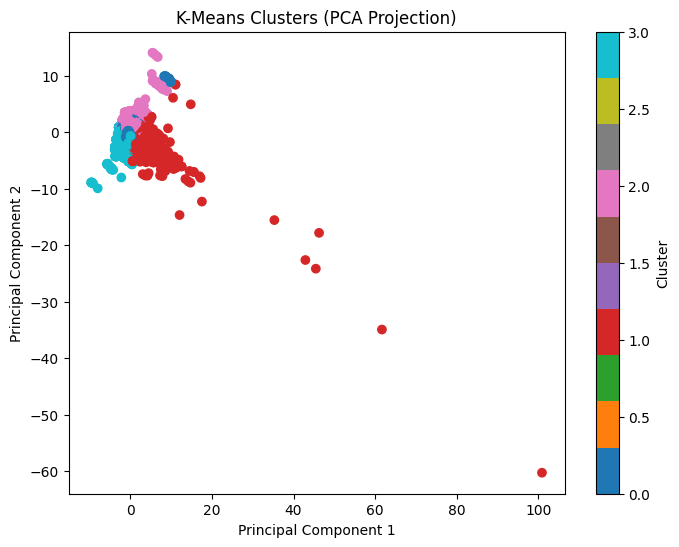

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=combined_df['KMeans_Cluster'], cmap='tab10')
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


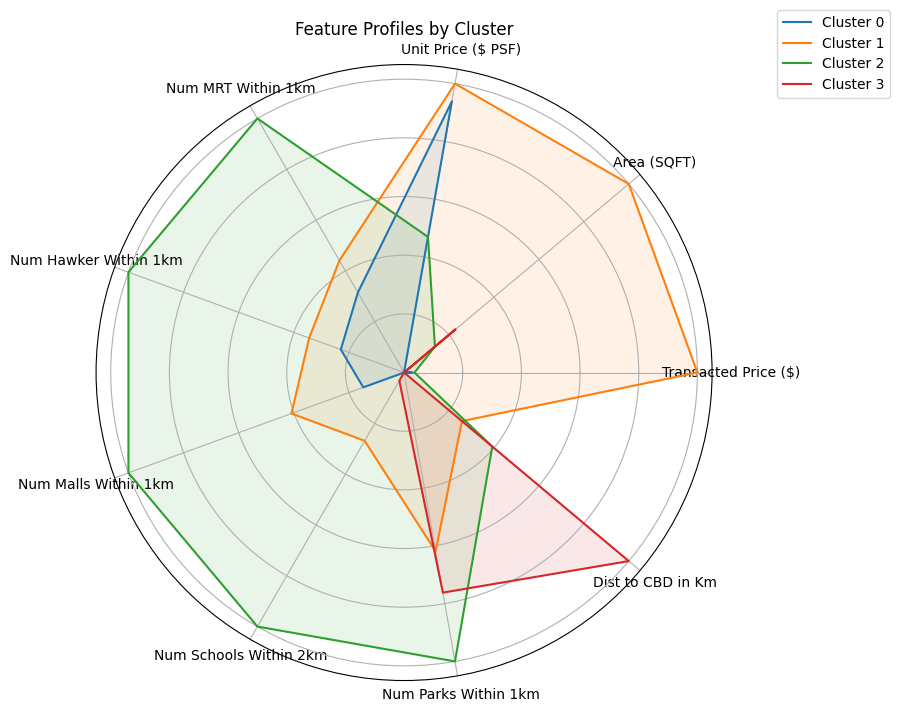

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize for comparison
cluster_summary_norm = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())

# Radar chart
labels = cluster_summary_norm.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for idx, (cluster, row) in enumerate(cluster_summary_norm.iterrows()):
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.1)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title("Feature Profiles by Cluster")
plt.show()
